# My First CNN on MNIST
---
## 일단 Quick 하게

코드는 정말 수루룩 끝난다!

그래서 다시 한 번! 아래 그림을 보고 구조를 확실히 추적할 수 있어야 한다.

* [Ex1](https://cdn-images-1.medium.com/max/1600/1*O9ulXVmjBustHGLi1zRthA.png)
* [Ex2](https://cdn-images-1.medium.com/max/1600/1*jqKHgwZ8alM3K_JRYO_l4w.png)



### 라이브러리 로딩

In [13]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 8239
다음 그림은 숫자 1 입니다.


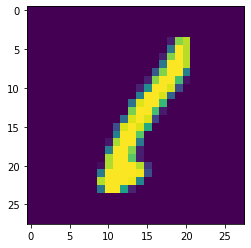

In [4]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### Convolutional Layer를 사용하기 위한 reshape!

- **채널이 추가되어야 한다**

In [5]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
_, h, w = train_x.shape

print(h, w)

28 28


In [7]:
train_x = train_x.reshape(train_x.shape[0], h, w, 1)
test_x = test_x.reshape(test_x.shape[0], h, w, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


* 이미지가 0 ~ 1 사이 값을 갖도록 스케일 조정!

In [8]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 255 , min : 0


In [9]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

In [10]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 1.0 , min : 0.0


## Sequential API로 모델링

CNN에 관한 것만 추가가 된다.
[여기](https://keras.io/layers/convolutional/)를 적극적으로 참고하자

In [12]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

In [15]:
## Sequential API
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 모델 발판 생성
model = Sequential()
# 3. 레이어 조립
model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(filters = 64, # Conv2D를 통해 제작하려는 Feature map의 수
                 kernel_size = (3, 3), #filter size
                 strides = (1, 1), #filter가 얼마나 촘촘히 훑을 것인가(sliding window)
                 padding = 'same', # filter가 훑기 전에 상하좌우로 픽셀을 덧붙임
                 activation = 'relu')) #activation 주의!!

model.add(MaxPool2D(pool_size=(2,2))) # pooling filter 사이즈

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
# 4. 컴파일
model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'],
              optimizer = 'adam') # 따로 전처리를 하는 걸 추천

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 126,090
Trainable params: 126,090
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

In [19]:
# 데이터를 넣어서 학습시키자!
hist = model.fit(train_x, train_y, epochs=1000,callbacks = [es],
                 validation_split=0.2, verbose=1)

Epoch 1/1000
1500/1500 [==============================] - 14s 3ms/step - loss: 0.2037 - accuracy: 0.9411 - val_loss: 0.0873 - val_accuracy: 0.9761
Epoch 2/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0741 - accuracy: 0.9786 - val_loss: 0.0682 - val_accuracy: 0.9812
Epoch 3/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0560 - accuracy: 0.9832 - val_loss: 0.0707 - val_accuracy: 0.9789
Epoch 4/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0443 - accuracy: 0.9868 - val_loss: 0.0698 - val_accuracy: 0.9797
Epoch 5/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0631 - val_accuracy: 0.9829
Epoch 6/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0672 - val_accuracy: 0.9818
Epoch 7/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.0695 

In [20]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print(f'Test Loss : {performance_test[0]:.6f} |  Test Accuracy : {performance_test[1]*100:.2f}%')

100/100 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9832
Test Loss : 0.057646 |  Test Accuracy : 98.32%


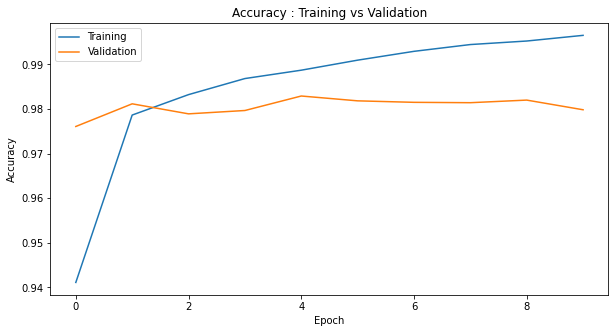

In [21]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

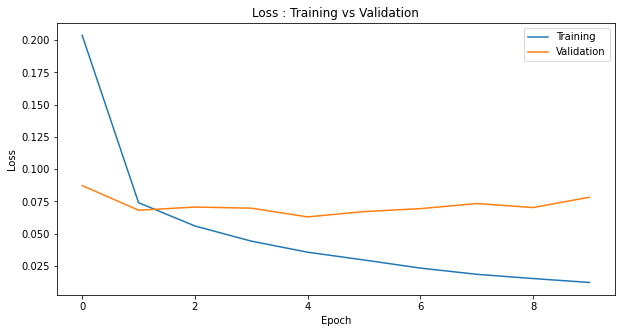

In [22]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

* 예측값 생성

In [23]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%' )
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%' )

313/313 [==============================] - 0s 1ms/step
CNN
트레이닝 정확도 : 99.07%
테스트 정확도 : 98.32%


## 숫자 이미지 시각화

id = 8543
다음 그림은 숫자 1 입니다.
모델의 예측 : 1
모델의 카테고리별 확률 : [ 0. 99.  0.  0.  0.  0.  0.  0.  0.  0.]
정답입니다


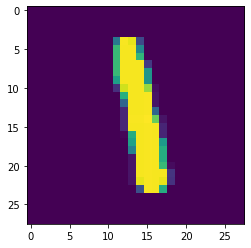

In [24]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 9024
다음 그림은 숫자 7 입니다.
모델의 예측 : 2
모델의 카테고리별 확률 : [ 0.  0. 87.  0.  0.  0.  0. 12.  0.  0.]
틀렸어요


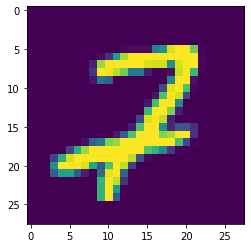

In [25]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y==single_pred_test)
f_id = np.where(true_false==False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()